In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import os

first_position = -19.69
n_slices = 4046
last_position = first_position + 0.01 * (n_slices - 1)

In [2]:
# probability, diameter, center y, voxel
info_table = np.loadtxt("queried_pores.csv", delimiter = ',', skiprows=1, usecols=(0, 2, 4, 7))

In [3]:
# define table of contents
pores_mat = np.zeros((n_slices, 3))

In [5]:
info_table

array([[ 2.451e+01,  4.000e-02, -1.859e+01,  1.300e+01],
       [ 6.260e+01,  1.000e-01, -1.839e+01,  1.040e+02],
       [ 2.405e+01,  3.000e-02, -1.819e+01,  9.000e+00],
       ...,
       [ 1.524e+01,  4.000e-02,  1.792e+01,  1.400e+01],
       [ 4.041e+01,  6.000e-02,  1.798e+01,  6.500e+01],
       [ 8.156e+01,  7.000e-02,  1.798e+01,  1.080e+02]])

In [6]:
for i in range(info_table.shape[0]):
    ind_num = info_table[i, 2]
    ind_loc = int((ind_num - first_position) / 0.01)
    
    pores_mat[ind_loc, 0] += 1 # number of holes
    pores_mat[ind_loc, 1] += info_table[i, 1] # averaged diameter
    pores_mat[ind_loc, 2] += info_table[i, 3] # averaged voxel

In [7]:
nonzero_ind = pores_mat[:, 0] > 0
pores_mat[nonzero_ind, 1] = pores_mat[nonzero_ind, 1] / pores_mat[nonzero_ind, 0]
pores_mat[nonzero_ind, 2] = pores_mat[nonzero_ind, 2] / pores_mat[nonzero_ind, 0]

In [11]:
np.sum(nonzero_ind)

309

### projection

In [55]:
# try pca to reduce dimension
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA as kpca

In [13]:
ae_features = np.load("ext_ft_sml_knl.npy")

In [16]:
ae_features.shape, pores_mat.shape

((4046, 6), (4046, 3))

In [52]:
pca = PCA(n_components=4)
pca.fit(ae_features)
valid_ = pca.transform(ae_features)

In [56]:
pca2 = kpca(n_components=4, kernel='rbf')
pca2.fit(ae_features)
valid_2 = pca2.transform(ae_features)

In [57]:
### correlation

pd.DataFrame({'f1':ae_features[:,0],
              'f2':ae_features[:,1],
              'f3':ae_features[:,2],
              'f4':ae_features[:,3],
              'f5':ae_features[:,4],
              'f6':ae_features[:,5],
              'pca1':valid_[:,0],
              'pca2':valid_[:,1],
              'pca3':valid_[:,2],
              'pca4':valid_[:,3],
              'kpca1':valid_2[:,0],
              'kpca2':valid_2[:,1],
              'kpca3':valid_2[:,2],
              'kpca4':valid_2[:,3],
              'num_pole':pores_mat[:,0],
              'diam':pores_mat[:,1],
              'vxl':pores_mat[:,2],}).corr().style.background_gradient(cmap='coolwarm')

,f1,f2,f3,f4,f5,f6,pca1,pca2,pca3,pca4,kpca1,kpca2,kpca3,kpca4,num_pole,diam,vxl
f1,1.000000,-0.287159,-0.414226,0.065970,0.430274,-0.297064,-0.353213,0.690310,-0.129494,0.612627,-0.016095,-0.012953,-0.003076,-0.038433,-0.016642,-0.026134,-0.016001
f2,-0.287159,1.000000,-0.187290,0.743584,-0.231744,-0.024611,0.984260,0.081966,0.144835,0.031501,-0.091207,-0.083825,-0.063093,-0.211686,-0.053492,-0.056684,-0.043198
f3,-0.414226,-0.187290,1.000000,0.085887,0.120284,-0.215633,-0.220398,-0.760816,0.584061,0.171639,0.203026,0.168642,0.147338,0.169946,0.034720,0.046248,0.036689
f4,0.065970,0.743584,0.085887,1.000000,0.304861,-0.110530,0.650124,0.220976,0.582769,0.378261,0.037190,0.035889,0.070367,-0.182170,-0.075564,-0.082249,-0.056226
f5,0.430274,-0.231744,0.120284,0.304861,1.000000,0.436735,-0.391962,0.535601,0.746375,0.030704,0.093031,0.080505,0.085109,0.025182,0.007310,0.003270,0.009233
f6,-0.297064,-0.024611,-0.215633,-0.110530,0.436735,1.000000,-0.075432,0.360016,0.324673,-0.870070,-0.026506,-0.022035,-0.030604,0.019972,0.016775,0.016663,0.012788
pca1,-0.353213,0.984260,-0.220398,0.650124,-0.391962,-0.075432,1.000000,-0.000000,0.000000,-0.000000,-0.104693,-0.093463,-0.072064,-0.210943,-0.055608,-0.058498,-0.045558
pca2,0.690310,0.081966,-0.760816,0.220976,0.535601,0.360016,-0.000000,1.000000,0.000000,-0.000000,-0.105776,-0.087011,-0.065532,-0.140122,-0.032370,-0.045129,-0.030832
pca3,-0.129494,0.144835,0.584061,0.582769,0.746375,0.324673,0.000000,0.000000,1.000000,0.000000,0.151703,0.127204,0.128003,0.029554,0.000195,0.002495,0.007946
pca4,0.612627,0.031501,0.171639,0.378261,0.030704,-0.870070,-0.000000,-0.000000,0.000000,1.000000,0.059967,0.050528,0.064446,-0.042043,-0.029312,-0.032998,-0.021448


In [58]:
color = ['green' if a==0 else 'red' for a in pores_mat[:,0]]
label = pores_mat[:,0]

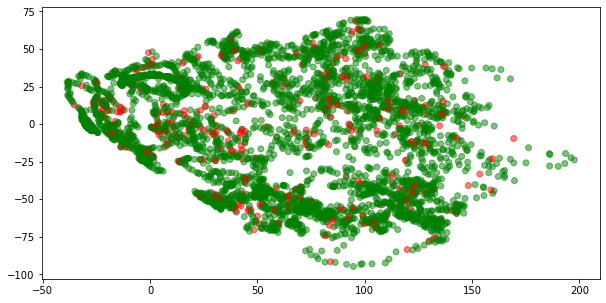

In [83]:
plt.figure(figsize=(10,5))
plt.scatter(ae_features[:, 1], ae_features[:, 4],marker='o', alpha=0.5, color=color)
plt.show()

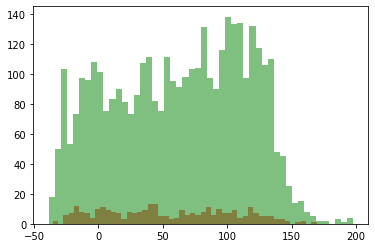

In [60]:
plt.hist(ae_features[:,1][np.where(np.array(label) != 0)[0]], bins=50, alpha=0.5, color='red')
plt.hist(ae_features[:,1][np.where(np.array(label) == 0)[0]], bins=50, alpha=0.5, color='green')
plt.show()

### scatter plot with continuous color

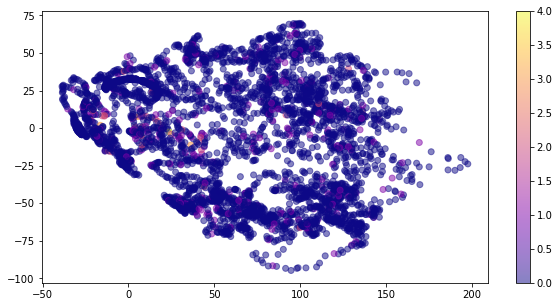

In [72]:
plt.figure(figsize=(10,5))
plt.scatter(ae_features[:, 1], ae_features[:, 4],marker='o', alpha=0.5, c=pores_mat[:,0], cmap='plasma')
plt.colorbar()
plt.show()

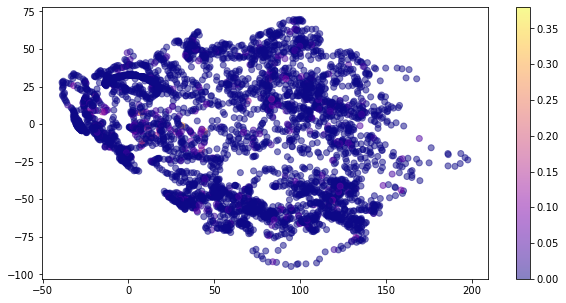

In [73]:
plt.figure(figsize=(10,5))
plt.scatter(ae_features[:, 1], ae_features[:, 4],marker='o', alpha=0.5, c=pores_mat[:,1], cmap='plasma')
plt.colorbar()
plt.show()

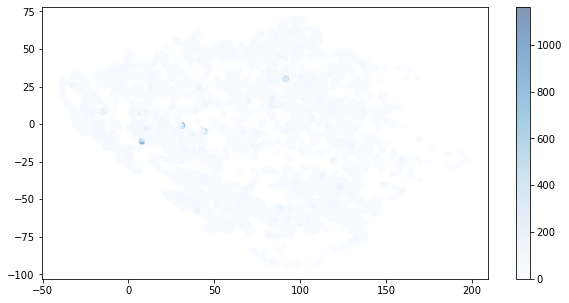

In [85]:
plt.figure(figsize=(10,5))
plt.scatter(ae_features[:, 1], ae_features[:, 4],marker='o', alpha=0.5, c=pores_mat[:,2], cmap='Blues')
plt.colorbar()
plt.show()